<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/AIML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
dataset ='/content/drive/MyDrive/Employee_StudyHours.csv'
import pandas as pd
df=pd.read_csv(dataset) #dataframe-terminology
df.head(5)




,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [4]:
df.shape


(32, 2)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     float64
dtypes: float64(2)
memory usage: 640.0 bytes


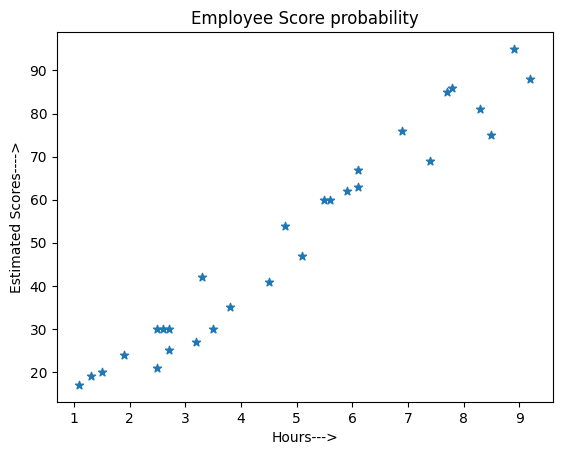

In [9]:
#step2: Visaulization of data
import matplotlib.pyplot as plt

plt.scatter(df.Hours,df['Scores'],marker='*')
plt.xlabel("Hours--->")
plt.ylabel("Estimated Scores---->")
plt.title("Employee Score probability")

plt.show()

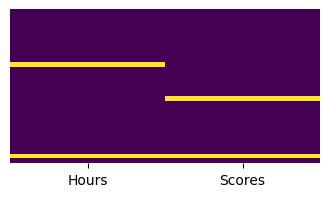

In [14]:
#seaborn library - Heatmaps
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

In [15]:
#Step3= Preprocessing the dataset
'''df.dropna()'''

median_v=df.Hours.median()
mean_v=df.Scores.mean()
print(median_v)



4.65


In [16]:
df['Hours']=df.Hours.fillna(median_v)

In [17]:
mean_v

51.46666666666667

In [20]:
import math
df['Scores']=df.Scores.fillna(math.floor(df.Scores.mean()))

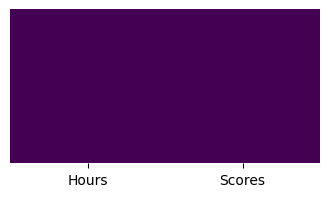

In [21]:
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

In [23]:
#Homework = KNN and Regression

#step4 - loading the data
#for a ML model we can only feed data in the form of array & array should be 2D
#x -> independent var -features
#y -> dependent var - target

#method1
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values
X
Y

array([[2.5 ],
       [5.1 ],
       [3.2 ],
       [8.5 ],
       [3.5 ],
       [1.5 ],
       [9.2 ],
       [5.5 ],
       [8.3 ],
       [2.7 ],
       [7.7 ],
       [4.65],
       [5.9 ],
       [4.5 ],
       [3.3 ],
       [1.1 ],
       [8.9 ],
       [2.5 ],
       [3.4 ],
       [1.9 ],
       [6.1 ],
       [7.4 ],
       [2.7 ],
       [4.8 ],
       [3.8 ],
       [6.9 ],
       [7.8 ],
       [1.3 ],
       [2.6 ],
       [6.1 ],
       [4.65],
       [5.6 ]])

In [27]:
#method2

import numpy as np
X=np.array(df[['Hours']])
X
Y=np.array(df[['Scores']])
Y

array([[21.],
       [47.],
       [27.],
       [75.],
       [30.],
       [20.],
       [88.],
       [60.],
       [81.],
       [25.],
       [85.],
       [85.],
       [62.],
       [41.],
       [42.],
       [17.],
       [95.],
       [30.],
       [51.],
       [24.],
       [67.],
       [69.],
       [30.],
       [54.],
       [35.],
       [76.],
       [86.],
       [19.],
       [30.],
       [63.],
       [51.],
       [60.]])

Step 5 :Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) #80% Training and 20% Testing

In [29]:
X_train

array([[2.5 ],
       [3.5 ],
       [1.9 ],
       [4.65],
       [8.9 ],
       [3.8 ],
       [1.3 ],
       [1.1 ],
       [9.2 ],
       [1.5 ],
       [7.4 ],
       [6.1 ],
       [8.3 ],
       [7.7 ],
       [2.7 ],
       [5.9 ],
       [3.2 ],
       [8.5 ],
       [5.5 ],
       [2.7 ],
       [3.3 ],
       [6.9 ],
       [4.5 ],
       [4.8 ],
       [4.65]])

In [30]:
X_test

array([[2.6],
       [7.8],
       [2.5],
       [6.1],
       [5.6],
       [3.4],
       [5.1]])

Step 6: Train the model -Feeding the model/Feeding the Algo


In [31]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

Step 7: testing the model

In [32]:
y_pred=model.predict(X_test)
y_pred

array([[29.85776857],
       [79.38011246],
       [28.9054158 ],
       [63.19011542],
       [58.42835158],
       [37.47659071],
       [53.66658775]])

In [ ]:
#python to print y_pred & y_test sideways

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(Y_test,y_pred)

0.08689541341455546

Step8: Perfromance Evaluation

In [33]:
model.score(X_test,Y_test)*100

88.10228019080297

In [34]:
model.score(X,Y)*100

87.70697289027659

Visualizing the result

In [36]:
model.coef_

array([[9.52352767]])

In [37]:
model.intercept_

array([5.09659663])

In [ ]:
y=(9.5)x+5.5 #best fit line

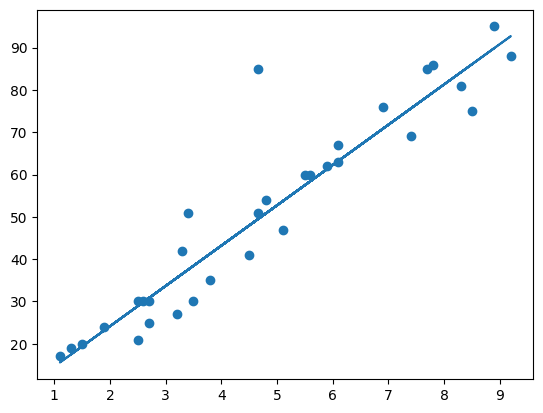

In [39]:
y_pred = model.coef_*X+model.intercept_

#plotting for data
plt.scatter(X,Y)
plt.plot(X,y_pred)

In [44]:
HourStudied = int(input("enter hours studied"))
y_pred = model.coef_*HourStudied+model.intercept_
y_pred

enter hours studied4


array([[43.19070731]])